# Case Study

**Data Challenge 2022:**

**Context**

This dataset was generously provided by Olist, the largest department store in Brazilian marketplaces. Olist connects small businesses from all over Brazil to channels without hassle and with a single contract. Those merchants are able to sell their products through the Olist Store and ship them directly to the customers using Olist logistics partners. See more on our website: www.olist.com

Olist, a Brazilian e-commerce marketplace integrator, is an online e-commerce site aggregation platform designed to facilitate direct sales on e-commerce sites of Brazil. The company's platform connects entrepreneurs with major online retailers and allows shopkeepers to advertise and sell in the marketplaces without complication, enabling retail companies to reach out to the international marketplaces, improve the shopping experience and modify their purchasing behavior. Olist connects small businesses from all over Brazil to channels without hassle and with a single contract. Those merchants are able to sell their products through the Olist Store and ship them directly to the customers using Olist logistics partners.


After a customer purchases the product from Olist Store a seller gets notified to fulfill that order. Once the customer receives the product, or the estimated delivery date is due, the customer gets a satisfaction survey by email where he can give a note for the purchase experience and write down some comments.

Attention
An order might have multiple items.
Each item might be fulfilled by a distinct seller.
All text identifying stores and partners where replaced by the names of Game of Thrones great houses.



**Brazilian Dataset**

This is a Brazilian ecommerce public dataset of orders made at Olist Store, an ecommerce store. The dataset has information of 100k orders from 2016 to 2018 made at multiple marketplaces in Brazil. Its features allows viewing an order from multiple dimensions: from order status, price, payment and freight performance to customer location, product attributes and finally reviews written by customers. We also released a geolocation dataset that relates Brazilian zip codes to lat/lng coordinates.

This is real commercial data, it has been anonymised, and references to the companies and partners in the review text have been replaced with the names of Game of Thrones great houses.





The dataset contains: 

100 k orders and order view from multiple dimensions: 

order status

price

payment

customer location

product attributes

reviews written by customer

geolocation dataset that relates Brazilian zip codes to lat/lng coordinates

and order has one or many order items.

**Dataset Description:**

The dataset has information of 100k orders from 2016 to 2018 made at multiple marketplaces in Brazil. Its features allows viewing an order from multiple dimensions: from order status, price, payment and freight performance to customer location, product attributes and finally reviews written by customers.The geolocation dataset that relates Brazilian zip codes to lat/lng coordinates.




**Schematic diagram explaining the connectivity between these tables.**

All the tables in the database are connected to each other using primary and freign keys. We shall join all the individual CSV files to create a large table. All these keys end with the suffix 'id' or 'prefix'.

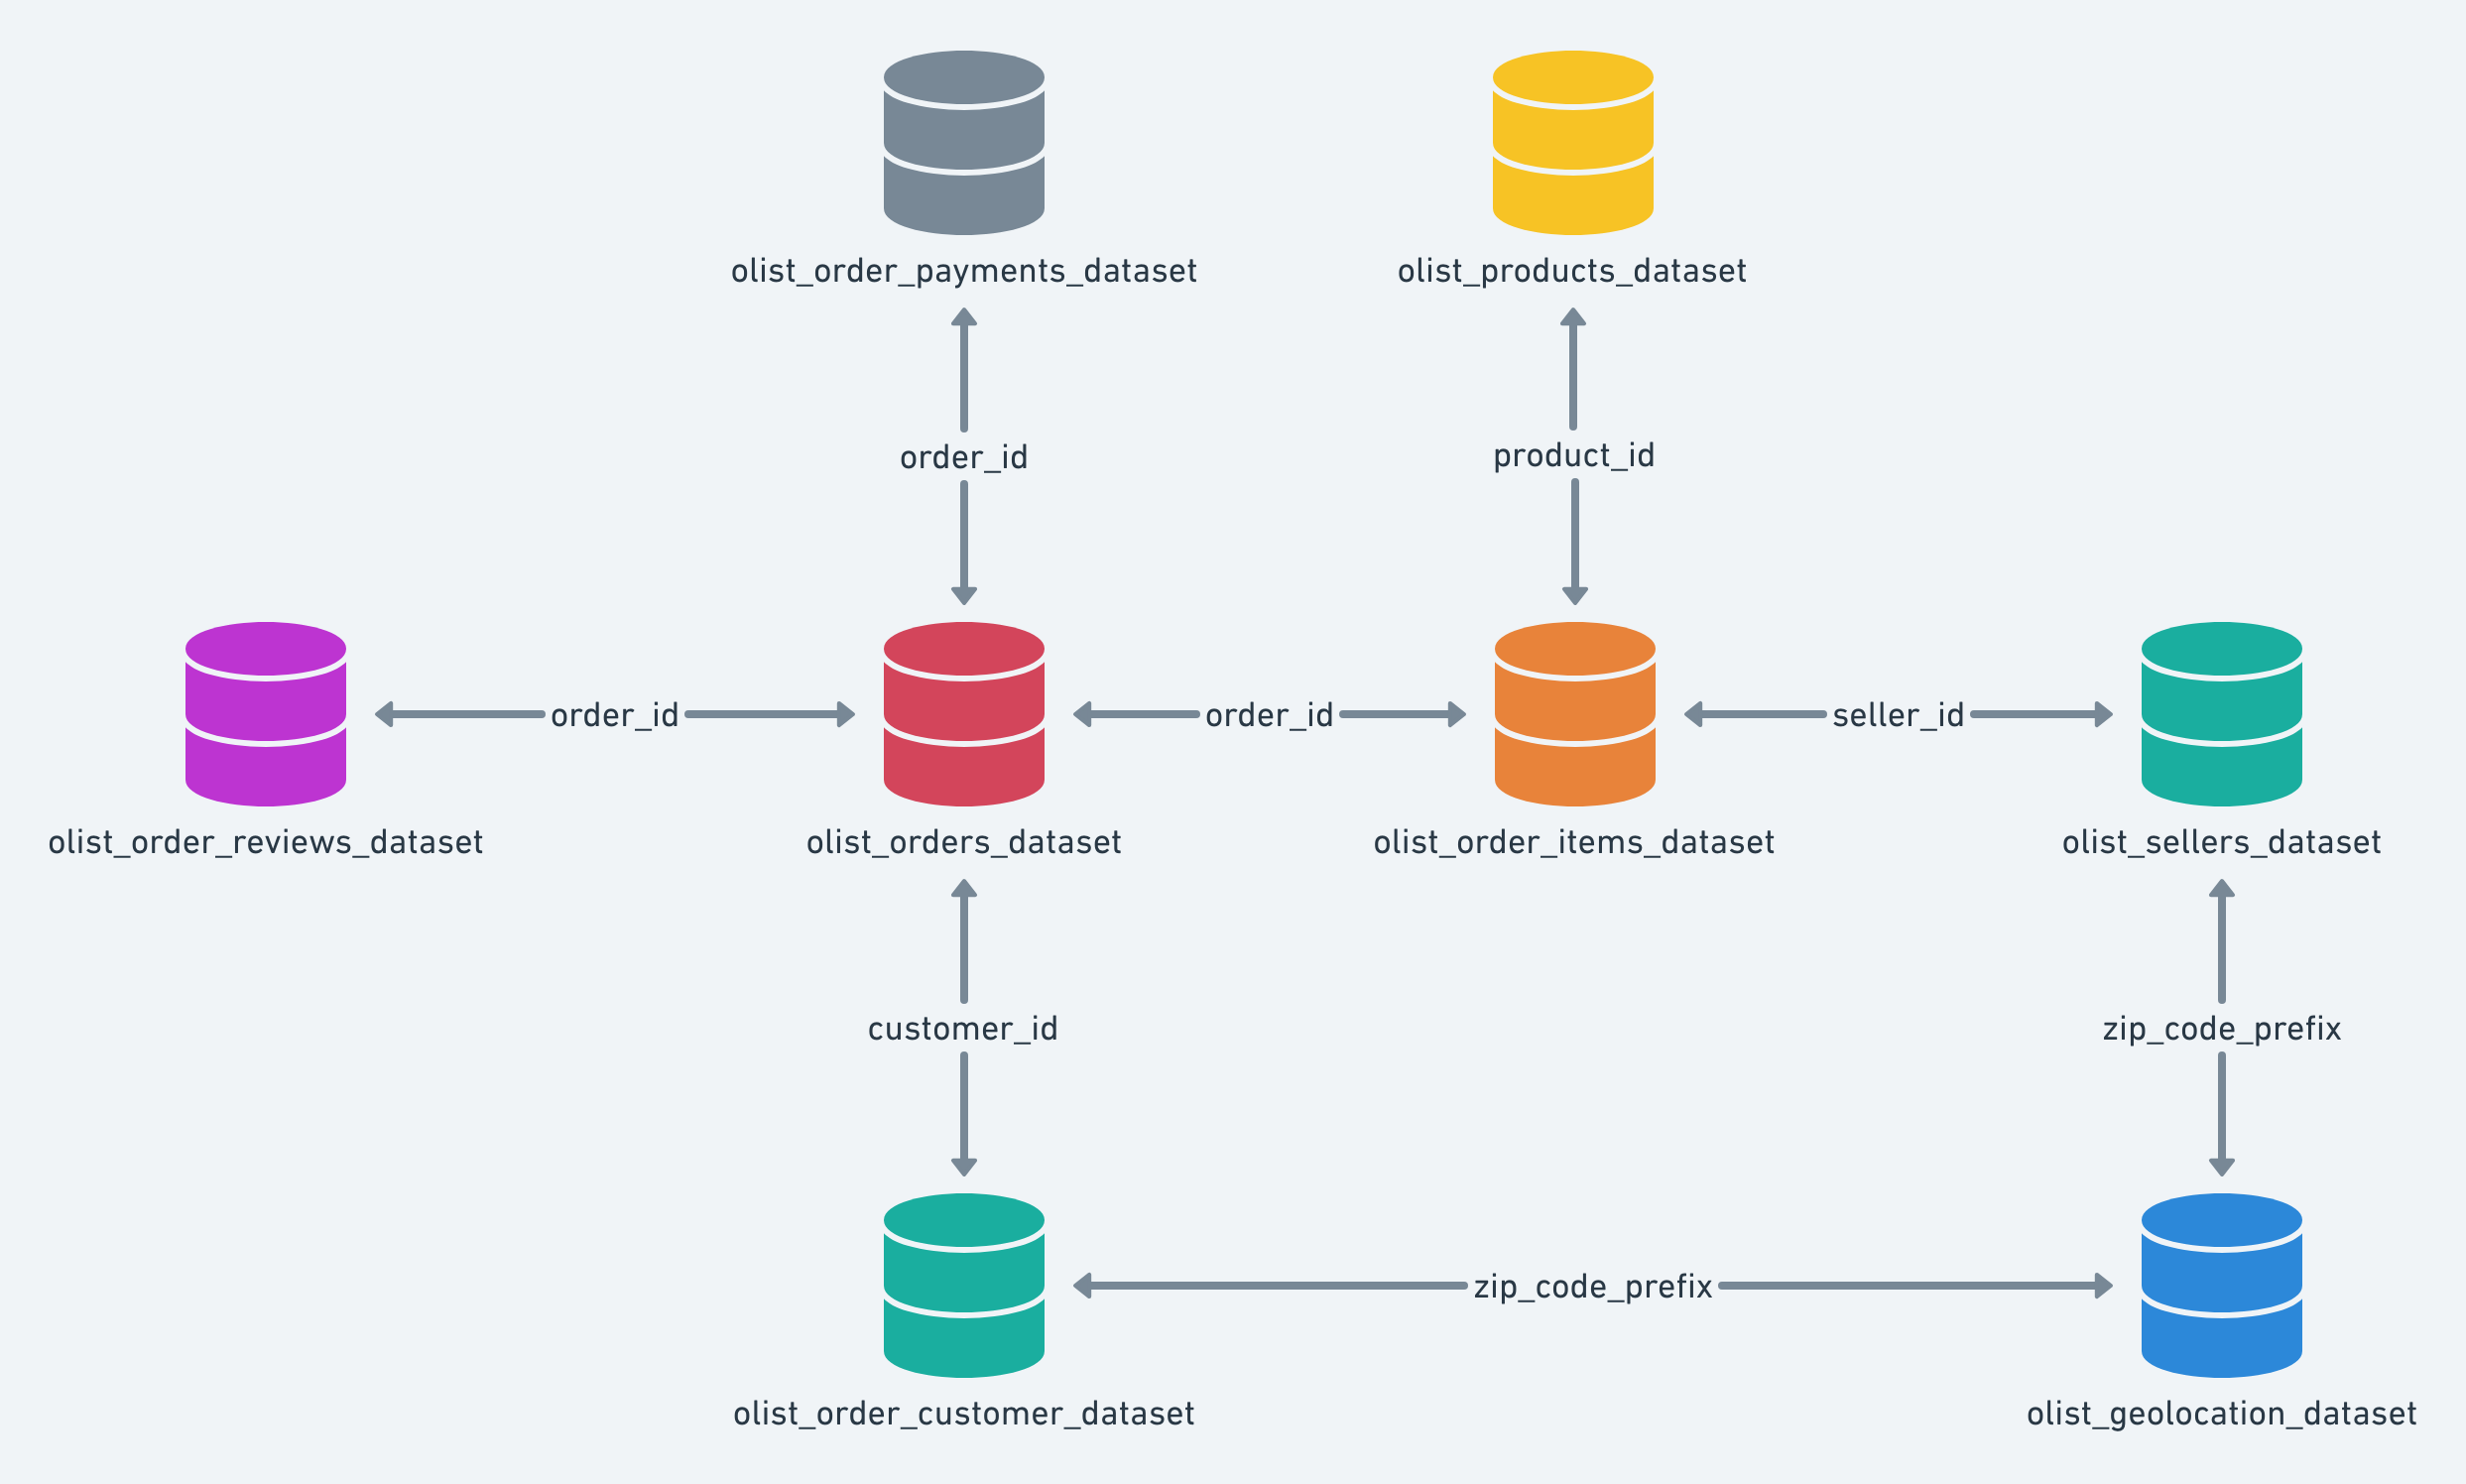

# ER Diagram & CSV files columns description

Description of various columns in different csv files:

olist_customers_dataset.csv

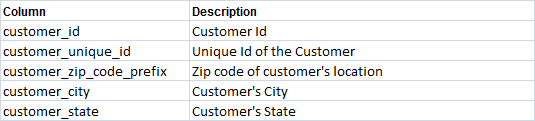

olist_sellers_dataset.csv

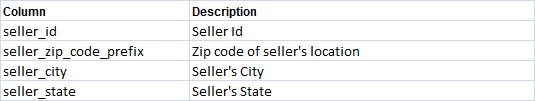

olist_order_items_dataset.csv

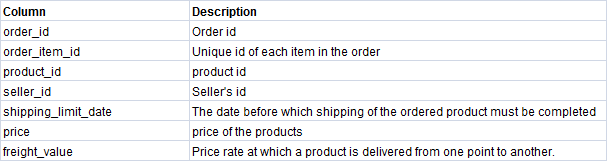

olist_order_payments_dataset.csv

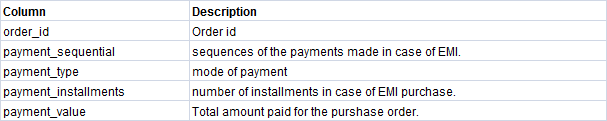

olist_orders_dataset.csv

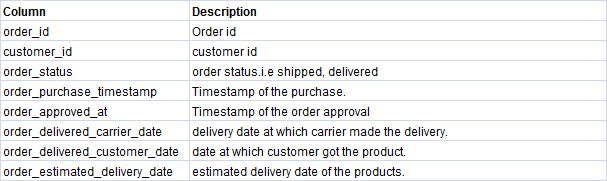

olist_order_reviews_dataset.csv

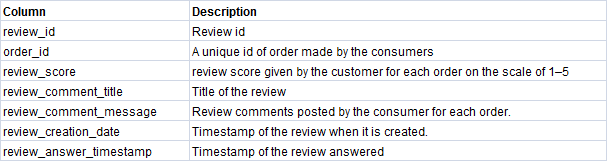

olist_products_dataset.csv

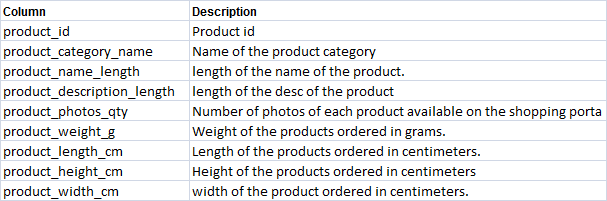

olist_geolocation_dataset.csv

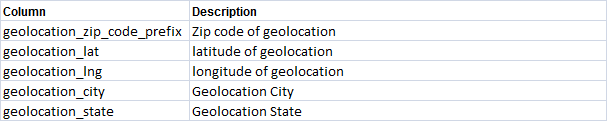

product_category_name_translation.csv

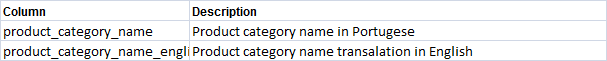




**ER Diagram:**

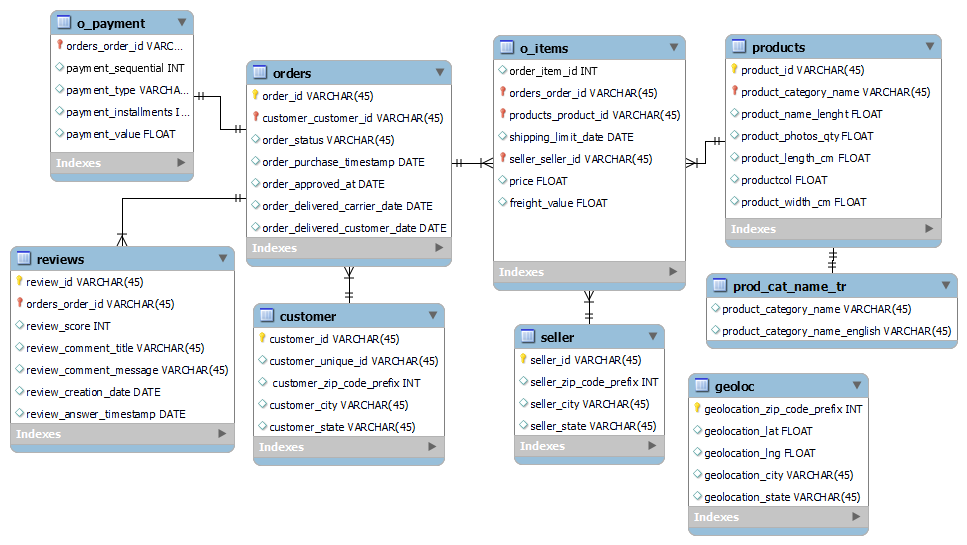

# Mount Drive

**Data Loading**

Connecting this notebook with Google drive.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Required Packages

Installing all the necessary dependencies.

In [2]:
!apt install proj-bin libproj-dev libgeos-dev 
!apt-get install libgeos-3.5.0
!pip install https://github.com/matplotlib/basemap/archive/v1.1.0.tar.gz
!pip install basemap
!pip install pyproj==1.9.6
!pip install fasttext
!python -m spacy download pt
!pip install tensorflow_addons

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.6.2-1build2).
libproj-dev is already the newest version (4.9.3-2).
proj-bin is already the newest version (4.9.3-2).
The following packages were automatically installed and are no longer required:
  cuda-command-line-tools-10-0 cuda-command-line-tools-10-1
  cuda-command-line-tools-11-0 cuda-compiler-10-0 cuda-compiler-10-1
  cuda-compiler-11-0 cuda-cuobjdump-10-0 cuda-cuobjdump-10-1
  cuda-cuobjdump-11-0 cuda-cupti-10-0 cuda-cupti-10-1 cuda-cupti-11-0
  cuda-cupti-dev-11-0 cuda-documentation-10-0 cuda-documentation-10-1
  cuda-documentation-11-0 cuda-documentation-11-1 cuda-gdb-10-0 cuda-gdb-10-1
  cuda-gdb-11-0 cuda-gpu-library-advisor-10-0 cuda-gpu-library-advisor-10-1
  cuda-libraries-10-0 cuda-libraries-10-1 cuda-libraries-11-0
  cuda-memcheck-10-0 cuda-memcheck-10-1 cuda-memcheck-11-0 cuda-nsight-10-0
  cuda-nsight-10-1 cuda-nsight-11-0 cuda

Importing the required packages.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import spacy
import regex as re
from datetime import datetime
from tqdm import tqdm
import pickle
import scipy
import fasttext.util
import warnings
import folium
from folium.plugins import HeatMap
from functools import reduce
#import squarify as sq
import os

import urllib
from io import BytesIO 
import requests

warnings.filterwarnings("ignore")
sns.set_theme(style="darkgrid")

Loading the data directly on Google Drive:

In [4]:
#from google.colab import files
#api_token = files.upload()

# Data Load (CSV files)

Loading all the CSV files onto RAM.

In [2]:
customers_dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/olist_customers_dataset.csv')
geolocation_dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/olist_geolocation_dataset.csv')
order_items_dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/olist_order_items_dataset.csv')
order_payments_dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/olist_order_payments_dataset.csv')
order_reviews_dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/olist_order_reviews_dataset.csv')
orders_dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/olist_orders_dataset.csv')
products_dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/olist_products_dataset.csv')
sellers_dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/olist_sellers_dataset.csv')
product_category_name_translation = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/product_category_name_translation.csv')

In [2]:
#customers_dataset = pd.read_csv('/content/olist_customers_dataset.csv')
#geolocation_dataset = pd.read_csv('/content/olist_geolocation_dataset.csv')
#order_items_dataset = pd.read_csv('/content/olist_order_items_dataset.csv')
#order_payments_dataset = pd.read_csv('/content/olist_order_payments_dataset.csv')
#order_reviews_dataset = pd.read_csv('/content/olist_order_reviews_dataset.csv')
#orders_dataset = pd.read_csv('/content/olist_orders_dataset.csv')
#products_dataset = pd.read_csv('/content/olist_products_dataset.csv')
#sellers_dataset = pd.read_csv('/content/olist_sellers_dataset.csv')
#product_category_name_translation = pd.read_csv('/content/product_category_name_translation.csv')

# EDA - Exploratory Data Analysis

# Geolocation dataset that relates Brazilian zip codes to lat/lng coordinates:


**Geolocation dataset that relates Brazilian zip codes to lat/lng coordinates:**

Since this dataset is based on a Brazilian e-commerce company, the area of circulation is most probably Brazil and its neighbouring countries. This is why we shall take the plot of the South American continent and use the geographical data mentioned in the geolocation dataset to visually depict the geographical locations of the orders.

In [6]:

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
%matplotlib inline

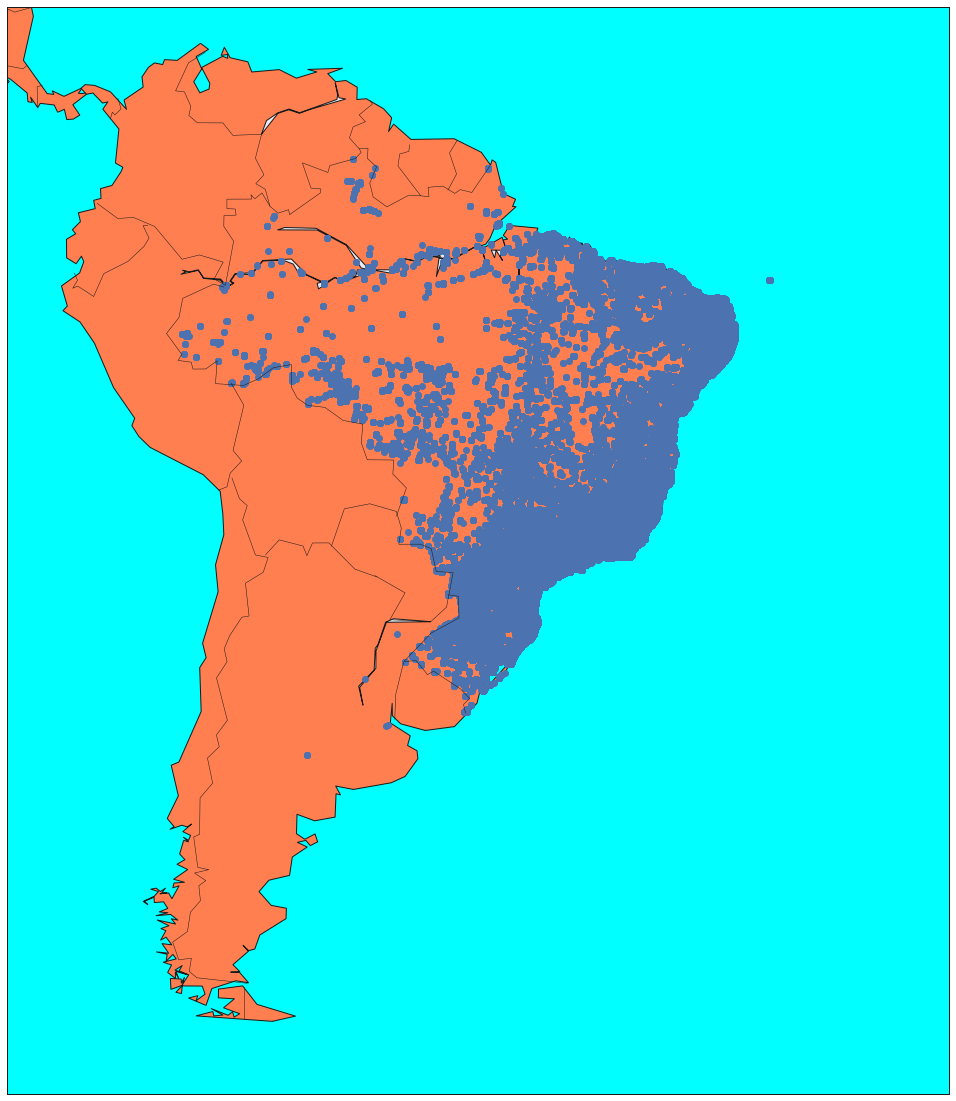

In [7]:
latitudes = geolocation_dataset['geolocation_lat'].values
longitudes = geolocation_dataset['geolocation_lng'].values

plt.figure(figsize=(20,20))
m = Basemap(llcrnrlat=-60,llcrnrlon=-85,urcrnrlat=15,urcrnrlon=-20)
m.drawcoastlines()
m.fillcontinents(color='coral')
m.scatter(longitudes,latitudes, zorder=2)
m.drawmapboundary(fill_color='aqua')
m.drawcountries()

plt.show()




**Region features**

Let's create a new set with latitude and longitude data for this analysis. We disregard duplicates keeping only the first occurrence, so we have a unique set of latitude and longitude for each zip code, which is not a problem since the zip code prefix we have usually refers to a neighborhood, not the full address



In [8]:
#list with datasets with PK and FK 'order_id'
ordersList = [orders_dataset, order_items_dataset]

#merge, join multiple datasets with the same FK:
data = reduce(lambda data1, data2: pd.merge(data1, data2, on='order_id', how='left'), ordersList)

data = pd.merge(data, products_dataset, on='product_id', how='outer')

data = pd.merge(data, sellers_dataset, on='seller_id', how='outer')

#merge final data with the same FK (customer_id):
data = pd.merge(data, customers_dataset, on='customer_id', how='outer')

# De-normalized data - All datasets together, OLAP.
print('columns:', data.columns)
print('shape:', data.shape)

columns: Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'product_category_name',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'seller_zip_code_prefix',
       'seller_city', 'seller_state', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state'],
      dtype='object')
shape: (113425, 29)


In [9]:
data_geolocation = geolocation_dataset.drop_duplicates(subset='geolocation_zip_code_prefix', keep='first')
#remove duplicates:
dataNonDuplicates = data.drop_duplicates(subset='customer_unique_id', keep='first')
#geographical data for customers:
dataGeo = pd.merge(dataNonDuplicates[['order_status','seller_city','seller_state','customer_city','customer_state', 'customer_zip_code_prefix']], 
                                     data_geolocation, 
                                     left_on='customer_zip_code_prefix', 
                                     right_on='geolocation_zip_code_prefix')
#convert lat and log to float:
dataGeo['lat'] = dataGeo['geolocation_lat'].astype(float).fillna(0)
dataGeo['long'] = dataGeo['geolocation_lng'].astype(float).fillna(0)
#convert to a tuple (lat,log) for the folium package:
tuple_lat_lon = list(zip(
            np.array(dataGeo['lat'], dtype=float),
            np.array(dataGeo['long'], dtype=float)
            ))


In [10]:
import sys
sys.setrecursionlimit(100)
mapCustomers = folium.Map(location=[-15.7941, -47.8825], 
                          tiles='cartodbpositron', 
#                           width=700, height=400,
                          zoom_start=5)



HeatMap(data=tuple_lat_lon, radius=13).add_to(mapCustomers)

print('Where are the active clients from: ')
mapCustomers

Where are the active clients from: 


For further analysis, we won't be using the geolocation dataset. This is why it won't be added to the main dataframe.

# Create Main Dataframe

In [11]:
order_items_products = pd.merge(order_items_dataset,products_dataset,on='product_id')
order_items_products_sellers = pd.merge(order_items_products,sellers_dataset,on='seller_id')
two_order_items_products_sellers = pd.merge(order_items_products_sellers,orders_dataset,on='order_id')
two_order_items_products_sellers_customer = pd.merge(two_order_items_products_sellers,customers_dataset,on='customer_id')
two_order_items_products_sellers_customer_reviews = pd.merge(two_order_items_products_sellers_customer,order_reviews_dataset,on='order_id')
final_dataframe = pd.merge(two_order_items_products_sellers_customer_reviews,order_payments_dataset,on='order_id')

We are given an extra csv file named 'product categry name translation'. This file contains the English translations of the original Portuguese text. We shall replace the original product category names with these translations.

In [12]:
mapping = dict(zip(product_category_name_translation['product_category_name'].tolist(),product_category_name_translation['product_category_name_english'].tolist()))
final_dataframe['product_category_name'] = final_dataframe['product_category_name'].map(mapping)

In [13]:
final_dataframe.head(3)

order_id  ...  payment_value
0  00010242fe8c5a6d1ba2dd792cb16214  ...          72.19
1  130898c0987d1801452a8ed92a670612  ...          73.86
2  532ed5e14e24ae1f0d735b91524b98b9  ...          83.23

[3 rows x 39 columns]

There are a few columns in this table which may not be necessary.

In [14]:
print(final_dataframe.columns)
final_dataframe.shape

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'seller_zip_code_prefix', 'seller_city', 'seller_state', 'customer_id',
       'order_status', 'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value'],
      dtype='object')


(117329, 39)

Dropping all the duplicates which have the same Order ID, Customer ID, purchase timestamp, review message. This is becasue a customer cannot post the same review multiple times for the same product at the same instant of time.

In [15]:
final_dataframe = final_dataframe.drop_duplicates(subset=['order_id','order_purchase_timestamp','product_id','customer_unique_id','review_comment_message'])
final_dataframe.shape

(101878, 39)

All the ID values are unique. We are dropping these columns since they don't contribute much to understanding the data. We also cannot work with.

# Product Attributes

In [16]:
final_dataframe.drop(['order_id','product_id','seller_id','customer_unique_id'], axis=1, inplace=True)
final_dataframe.columns

Index(['order_item_id', 'shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'seller_zip_code_prefix', 'seller_city', 'seller_state', 'customer_id',
       'order_status', 'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'review_id', 'review_score',
       'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp', 'payment_sequential',
       'payment_type', 'payment_installments', 'payment_value'],
      dtype='object')

In [17]:
final_dataframe[['price','freight_value','product_name_lenght','product_description_lenght','product_weight_g','product_length_cm', 'product_height_cm', 'product_width_cm']].head()

price  freight_value  ...  product_height_cm  product_width_cm
0   58.9          13.29  ...                9.0              14.0
1   55.9          17.96  ...                9.0              14.0
2   64.9          18.33  ...                9.0              14.0
3   58.9          16.17  ...                9.0              14.0
4   58.9          13.29  ...                9.0              14.0

[5 rows x 8 columns]

For datetime data, we cannot work with null values. Dropping those rows which contain null values is needed.

In [18]:
final_dataframe.dropna(subset=['shipping_limit_date','order_purchase_timestamp','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date'], inplace=True)

We are parsing through some of the datetime columns and extracting the date information. The 'purchase delivery difference' gives us the number of days between the time of purchase and delivery. The 'estimated actual delivery difference' gives us the delay or the cut-down in the number of days actually required for the delivery.

In [19]:
intermediate_time = final_dataframe['order_delivered_customer_date'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S").date()) - final_dataframe['order_purchase_timestamp'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S").date())
final_dataframe['purchase-delivery difference'] = intermediate_time.apply(lambda x:x.days)

intermediate_time = final_dataframe['order_estimated_delivery_date'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S").date()) - final_dataframe['order_delivered_customer_date'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S").date())
final_dataframe['estimated-actual delivery difference'] = intermediate_time.apply(lambda x:x.days)

# Data Clean



While moving onto the other types of columns, we shall find how many rows contains null values.

In [20]:
final_dataframe.isnull().sum()

order_item_id                               0
shipping_limit_date                         0
price                                       0
freight_value                               0
product_category_name                    1416
product_name_lenght                      1396
product_description_lenght               1396
product_photos_qty                       1396
product_weight_g                           16
product_length_cm                          16
product_height_cm                          16
product_width_cm                           16
seller_zip_code_prefix                      0
seller_city                                 0
seller_state                                0
customer_id                                 0
order_status                                0
order_purchase_timestamp                    0
order_approved_at                          14
order_delivered_carrier_date                0
order_delivered_customer_date               0
order_estimated_delivery_date     

After finding all the null values, we shall impute. For the categorical columns, we shall use the mode and for numerical columns we shall use the median for imputation. For revivew comments and title, we use the term 'indisponível' which is the Portuguese for unavailable.

In [21]:
final_dataframe['product_category_name'].fillna(value=final_dataframe['product_category_name'].mode()[0], inplace=True)
final_dataframe['product_name_lenght'].fillna(value=final_dataframe['product_name_lenght'].mode()[0], inplace=True)
final_dataframe['product_description_lenght'].fillna(value=final_dataframe['product_description_lenght'].median(), inplace=True)
final_dataframe['product_photos_qty'].fillna(value=final_dataframe['product_photos_qty'].mode()[0], inplace=True)
final_dataframe['product_weight_g'].fillna(value=final_dataframe['product_weight_g'].mode()[0], inplace=True)
final_dataframe['product_length_cm'].fillna(value=final_dataframe['product_length_cm'].mode()[0], inplace=True)
final_dataframe['product_height_cm'].fillna(value=final_dataframe['product_height_cm'].mode()[0], inplace=True)
final_dataframe['product_width_cm'].fillna(value=final_dataframe['product_width_cm'].mode()[0], inplace=True)
final_dataframe['review_comment_message'].fillna(value='indisponível', inplace=True)

# What is the order average review score? Reviews writing by customers: (negative/positive)


It is possible to convert this problem into a multiclass classification task. For doing this, we shall convert all the review scores greater than 3 as part of the positive and the ones below 3 as part of the negative class. Reviews which have the value of 3 is considered to be part of the neutral class.

In [22]:
final_dataframe['review_score'] = final_dataframe['review_score'].apply(lambda x: 1 if x > 3 else 0)

In [23]:
final_dataframe['review_score'].unique()

array([1, 0])

On plotting the pie chart showing the review scores, we see that the positive class occupies 78.00% of the entire dataset; whereas the negative class only occupies 22.00%.

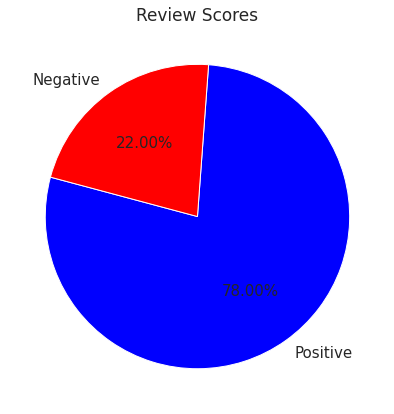

In [24]:
plt.figure(figsize=(7,7))
final_dataframe['review_score'].map({0:'Negative',1:'Positive'}).value_counts().plot.pie(autopct='%.2f%%', textprops={'fontsize':15}, startangle=165, colors=['blue','red','#f6b48f'])
plt.title('Review Scores', fontsize=17)
plt.ylabel('')
plt.show()

Some columns contain only numerical data. This means that finding the basic statistics of these columns is one thing which we can try. Notice that there is a significant difference between the mean and median values for the 'price' and 'product length description' columns.

In [25]:
final_dataframe[['price','freight_value','product_name_lenght','product_description_lenght','product_weight_g','product_length_cm', 'product_height_cm', 'product_width_cm']].describe().round(3)

price  freight_value  ...  product_height_cm  product_width_cm
count  99741.000      99741.000  ...          99741.000         99741.000
mean     123.530         20.061  ...             16.357            23.024
std      186.164         15.763  ...             13.264            11.724
min        0.850          0.000  ...              2.000             6.000
25%       40.000         13.140  ...              8.000            15.000
50%       78.000         16.320  ...             13.000            20.000
75%      139.000         21.180  ...             20.000            30.000
max     6735.000        409.680  ...            105.000           118.000

[8 rows x 8 columns]

Let us create a new column called 'price category' This column is used to categorize the goods as expensive, cheap and affordable based on their price. We have used the first, second and third quartiles as the conditions for creating these categories.

In [27]:
final_dataframe['price_category'] = final_dataframe['price'].apply(lambda x:'expensive' if x>=139 else ('affordable' if x>=40 and x<139 else 'cheap'))

# Key Performance Indicators - KPI:  Total Orders

In [28]:
final_dataframe['price'].count()


99741

# Total Sales ($)

In [29]:
final_dataframe['price'].sum().round(3)

12321014.17

# Which categories are most sold in quantity? Top most popular categories



We are now finding the top 12 most popular product categories in terms of the frequency of purchase. THe category 'bed bath table' significantly more popular than most of the other categories. It is the only category whose sales have crossed 10000 units. The category in the 12th position - 'garden tools' only had around 3500 units sold.

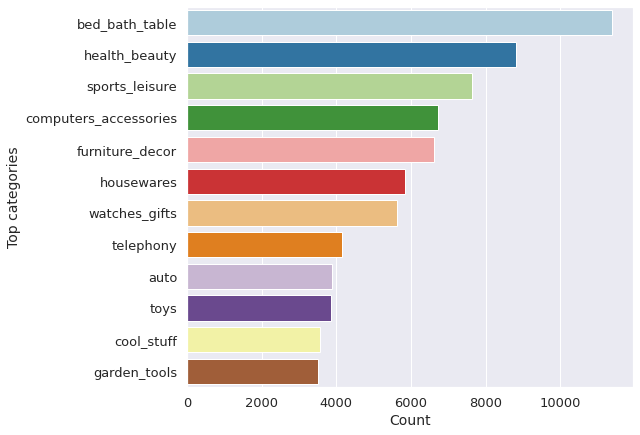

In [30]:
plt.figure(figsize=(8,7))
idx = final_dataframe['product_category_name'].value_counts()[:12].index
sns.countplot(y=final_dataframe['product_category_name'], order=idx, palette="Paired")
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Top categories', fontsize=14)
plt.show()

# Which regions / cities pay more for transportation? Top Cities by price average:

Sao Paulo, also shortened to 'SP' is by leaps and bounds the state with the highest customer base for this firm. It might be dur to the fact that this company's headquarters is set up in Sao Paulo and more customers were informed about this website due to their heavy marketing strategy around that area. More than 40000 units were sold in Sao Paulo between 2016 and 2018.

We see that in SP, RJ and MG we have the highest total values. This is an expected behavior since in the Southeast region we have a much higher number of purchases.

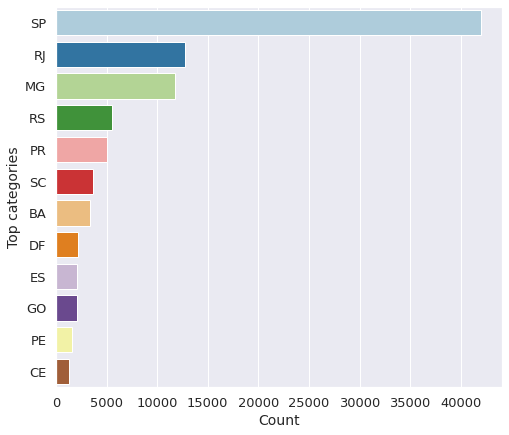

In [31]:
plt.figure(figsize=(8,7))
idx = final_dataframe['customer_state'].value_counts()[:12].index
sns.countplot(y=final_dataframe['customer_state'], order=idx, palette="Paired")
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Top categories', fontsize=14)
plt.show()

# Top Categories by price average



When we check the pricing per product category, we can see that the average cost of a product is the highest for the items belonging to the 'computers' category. The average cost is around 1500 real. The second highest category has an average price of nearly half of the highest category.

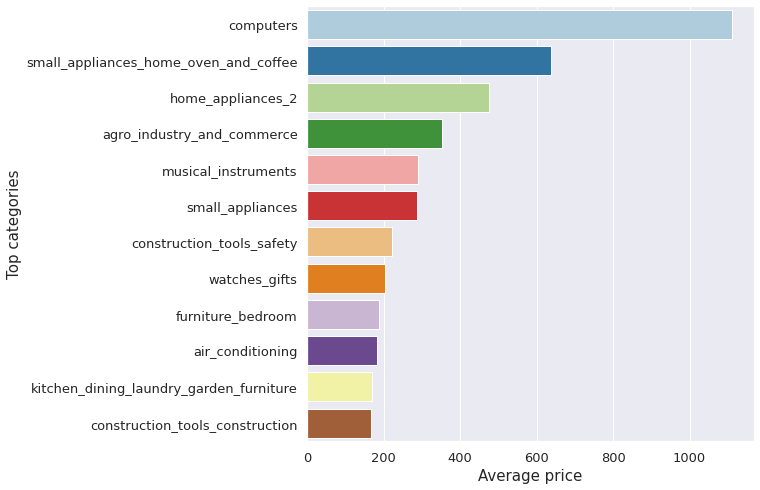

In [32]:
grp_cat_name = final_dataframe.groupby('product_category_name')
grp_dict = dict(grp_cat_name.mean()['price'].sort_values(ascending=False)[:12])
plt.figure(figsize=(8,8))
sns.barplot(y=list(grp_dict.keys()),x=list(grp_dict.values()), palette="Paired")
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Average price', fontsize=15)
plt.ylabel('Top categories', fontsize=15)
plt.show()

# Average cost per item



For this plot, we considered the overall average cost of an item. This means that it is the sum of the fright charges and the original cost of the item. We can see that the ordering of the plot hasn't changed. It's only that the average cost of each category that has increased.

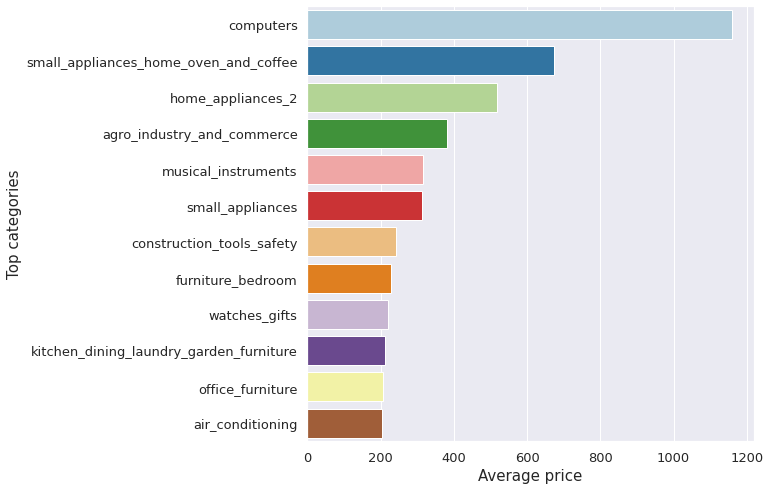

In [33]:
grp_dict = dict((grp_cat_name.mean()['price']+grp_cat_name.mean()['freight_value']).sort_values(ascending=False)[:12])
plt.figure(figsize=(8,8))
sns.barplot(y=list(grp_dict.keys()),x=list(grp_dict.values()), palette="Paired")
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Average price', fontsize=15)
plt.ylabel('Top categories', fontsize=15)
plt.show()

# Where does most revenue come from ? City with high revenue:

We are now finding the city which generates the highest revenue. 

The city named '**Pianco**' generates the highest revenue.

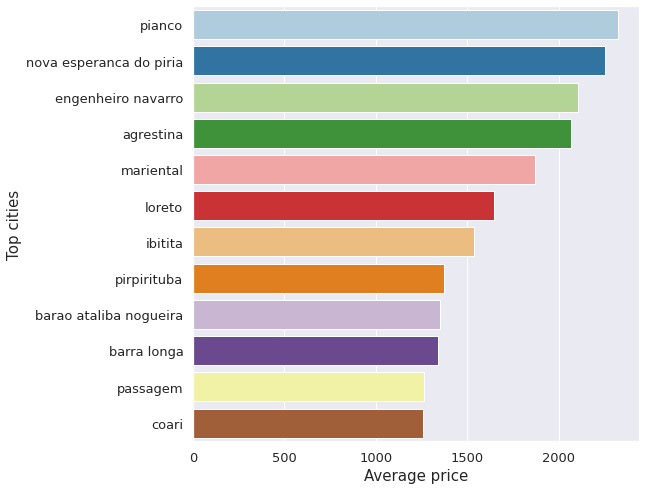

In [34]:
grp_state_name = final_dataframe.groupby('customer_city')
grp_dict = dict((grp_state_name.mean()['price']+grp_state_name.mean()['freight_value']).sort_values(ascending=False)[:12])
plt.figure(figsize=(8,8))
sns.barplot(y=list(grp_dict.keys()),x=list(grp_dict.values()), palette="Paired")
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Average price', fontsize=15)
plt.ylabel('Top cities', fontsize=15)
plt.show()

# Order Status: (time taken for delivery)

There are only two statuses visible here. Only 7 orders have been cancelled till date.

In [35]:
final_dataframe['order_status'].value_counts()

delivered    99734
canceled         7
Name: order_status, dtype: int64

It doesn't make sense to analyze those products which have been cancelled. Thus, we shall delete them.

In [36]:
final_dataframe = final_dataframe[final_dataframe['order_status'] != 'canceled']

# What is the average delivery time for orders? Average Delivery Time By Category


The office furniture is the most delayed category and the computers have the less delayed category.

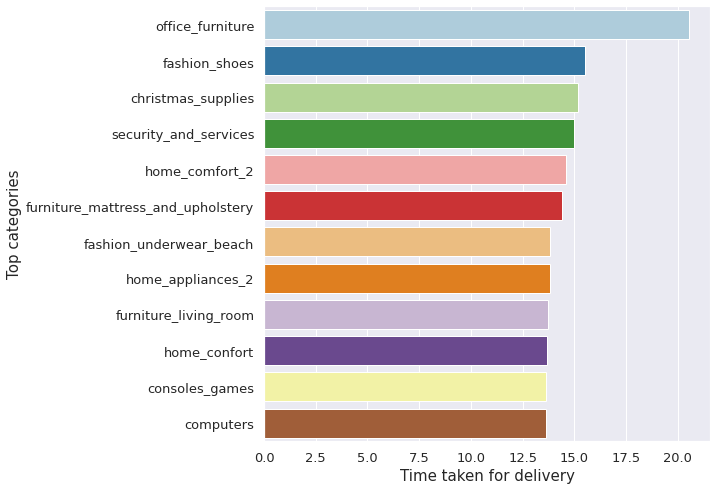

In [37]:
grp_cat_name = final_dataframe.groupby('product_category_name')
grp_dict = dict(grp_cat_name.mean()['purchase-delivery difference'].sort_values(ascending=False)[:12])
plt.figure(figsize=(8,8))
sns.barplot(y=list(grp_dict.keys()),x=list(grp_dict.values()), palette="Paired")
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Time taken for delivery', fontsize=15)
plt.ylabel('Top categories', fontsize=15)
plt.show()


# What is the percentage of delayed orders ? Price vs total time difference between delivery and purchase (related to score) 


The below-given scatter plot takes the price on the x-axis and total time difference between delivery and purchase on the y-axis. It can be seen that as the time itaken for delivery increases, the chances to being dissatisfied with the product increases significantly. The increase in price of an item does not cause too much dissatisfaction if it is delivered on time.

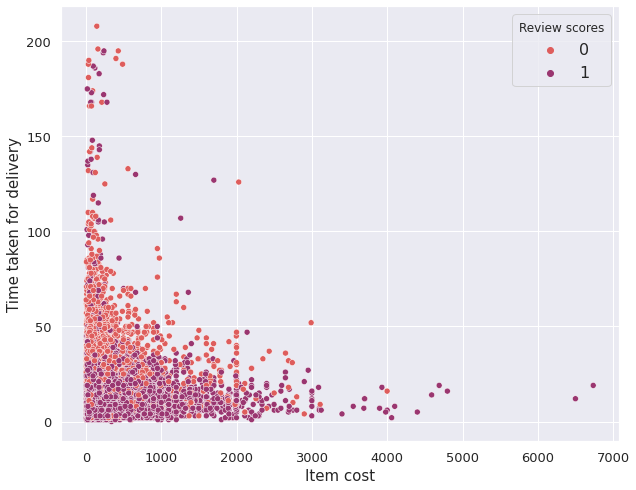

In [38]:
#Reference: https://stackoverflow.com/a/7125157

plt.figure(figsize=(10,8))
sns.scatterplot(x=final_dataframe['price'],y=final_dataframe['purchase-delivery difference'],hue=final_dataframe['review_score'],palette="flare")
plt.xlabel('Item cost', fontsize=15)
plt.ylabel('Time taken for delivery', fontsize=15)
plt.legend(prop={'size':16}, title='Review scores')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

In [39]:
final_dataframe['purchase_delivery_diff_per_price'] = final_dataframe['purchase-delivery difference']/final_dataframe['price']

# What is the product and freight value? Freight Cost vs. Item Cost:


The scatter plot between the freight cost and item cost very much descriptive. But it can be said that even if the freight cost is high, customers were satisfied when the item cost is less.

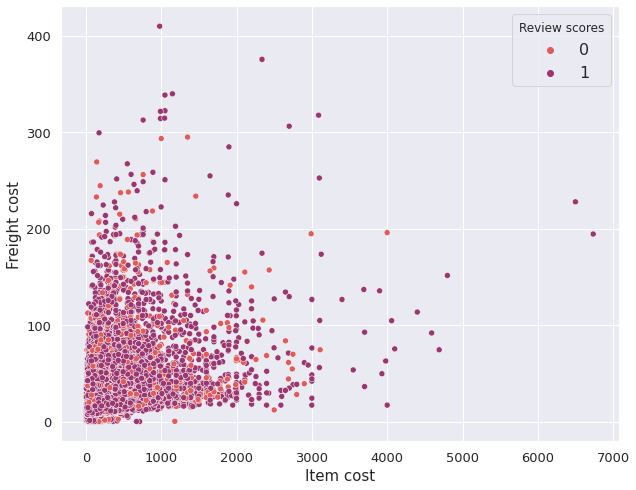

In [40]:
#Reference: https://stackoverflow.com/a/7125157

plt.figure(figsize=(10,8))
sns.scatterplot(x=final_dataframe['price'],y=final_dataframe['freight_value'],hue=final_dataframe['review_score'], palette='flare')
plt.xlabel('Item cost', fontsize=15)
plt.ylabel('Freight cost', fontsize=15)
plt.legend(prop={'size':16}, title='Review scores')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

# Payment Type Distribution (number of orders)


Credit cards are the most popular mode of payment among the customers. They are much more popular than the other alternatives. The second in line, Boletos are a type of vouchers which can only be found only in Brazil. From this plot we could see that the bad reviews given to a product were most probably not because of a payment related issue.

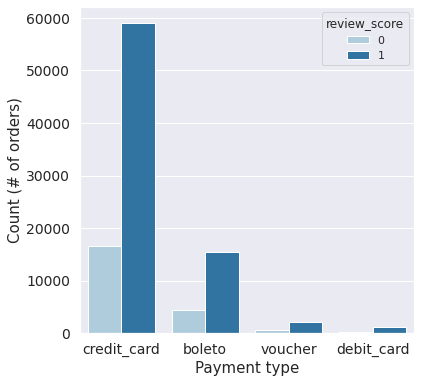

In [41]:
plt.figure(figsize=(6,6))
sns.countplot(data=final_dataframe,x='payment_type', hue='review_score', palette='Paired')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Payment type', fontsize=15)
plt.ylabel('Count (# of orders)', fontsize=15)
plt.show()

# Payment Type Distribution (order value)


Credit cards are the most popular mode of payment among the customers with most value.

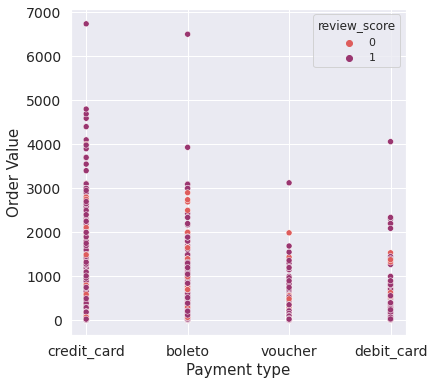

In [42]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=final_dataframe['payment_type'],y=final_dataframe['price'],hue=final_dataframe['review_score'], palette='flare')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Payment type', fontsize=15)
plt.ylabel('Order Value', fontsize=15)
plt.show()

# What is the Orders Average Review Score? By Region/City and product category

Orders Average Review Score - By Region/City and product category

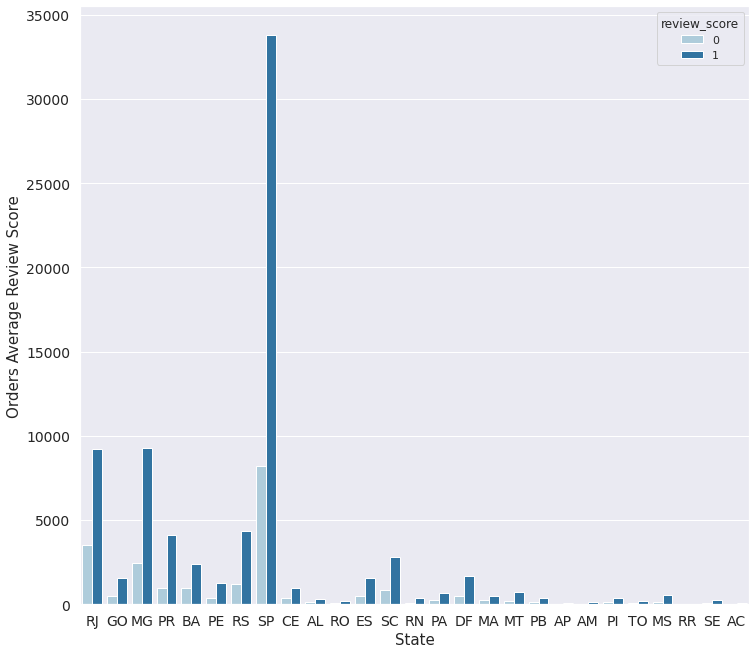

In [43]:
plt.figure(figsize=(12,11))
sns.countplot(data=final_dataframe,x='customer_state', hue='review_score', palette='Paired')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('State', fontsize=15)
plt.ylabel('Orders Average Review Score', fontsize=15)
plt.show()

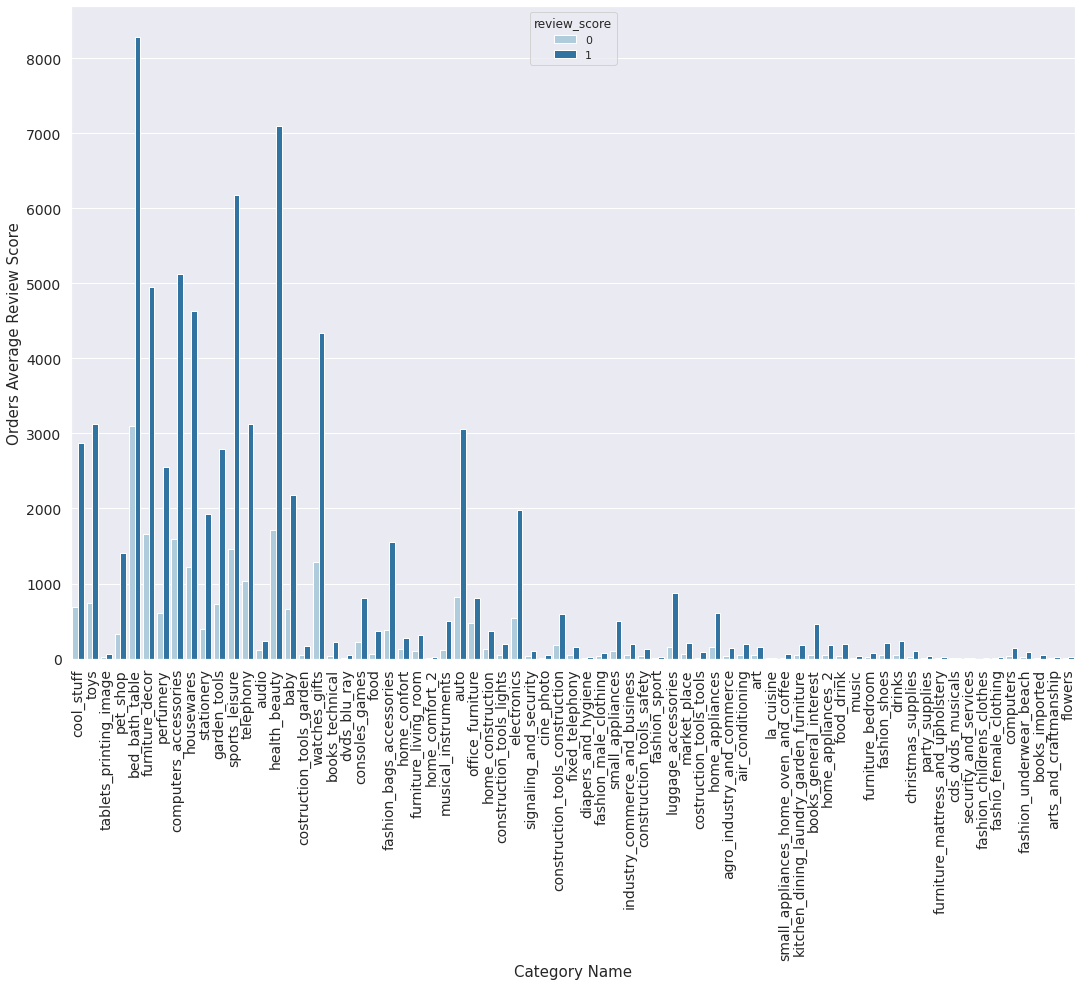

In [44]:
plt.figure(figsize=(18,12))
sns.countplot(data=final_dataframe,x='product_category_name', hue='review_score', palette='Paired')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Category Name', fontsize=15)
plt.ylabel('Orders Average Review Score',fontsize=15)
plt.xticks(rotation=90)
plt.show()



---



# Export

**Export Dataset:**

Export on file (on Google Drive) called: 

`final_dataframe.csv`

In [ ]:
import os
os.chdir(r'./')
final_dataframe.to_csv('final_dataframe.csv',sep = '\t',index = True)
from IPython.display import FileLink
#FileLink(r'/content/final_dataframe.csv')



---



# Machine Learning: Shipment Time Prediction

Make a model for Shipment time prediction where the prediction variable must be the: estimated delivery time against the key features.

Import Libraries for Regression

In [3]:
#for ML analysis:
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, OrdinalEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, log_loss
from tensorflow_addons.metrics import F1Score
from sklearn.utils.extmath import randomized_svd
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Dropout, Embedding, LSTM, Flatten, Concatenate, Reshape, Conv1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.regularizers import l2
from xgboost import XGBClassifier
from prettytable import PrettyTable
from keras.models import load_model
from sklearn.metrics import plot_confusion_matrix

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import seaborn as sns
import matplotlib.pyplot as plt
from math import radians, sin, cos, asin, sqrt
from sklearn import preprocessing, model_selection, metrics
from sklearn.model_selection import train_test_split
from pandas import to_datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
from xgboost import XGBRegressor, XGBClassifier
from sklearn import neighbors
from sklearn.svm import SVR
import time
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error

Remame Dataframes:

In [5]:
customers = customers_dataset
geolocation =  geolocation_dataset
order_items =  order_items_dataset
orders =  orders_dataset
products = products_dataset
sellers = sellers_dataset

Auxiliary function for distance between two pairs of (lat, long)

In [6]:
def haversine_distance(lat1, lon1, lat2, lon2):
    """
    Compute distance between two pairs of (lat, lng)
    """
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2) ** 2 + cos(lat1) * cos(lat2) * sin(dlon / 2) ** 2
    return 2 * 6371 * asin(sqrt(a))

Check geolocation in radians:

In [7]:
np.deg2rad(geolocation.geolocation_lat)

0         -0.410949
1         -0.410957
2         -0.410957
3         -0.410927
4         -0.410878
             ...   
1000158   -0.489890
1000159   -0.486548
1000160   -0.489946
1000161   -0.495480
1000162   -0.489916
Name: geolocation_lat, Length: 1000163, dtype: float64

# Check Information

Check orders

In [8]:
orders.head()

order_id  ... order_estimated_delivery_date
0  e481f51cbdc54678b7cc49136f2d6af7  ...           2017-10-18 00:00:00
1  53cdb2fc8bc7dce0b6741e2150273451  ...           2018-08-13 00:00:00
2  47770eb9100c2d0c44946d9cf07ec65d  ...           2018-09-04 00:00:00
3  949d5b44dbf5de918fe9c16f97b45f8a  ...           2017-12-15 00:00:00
4  ad21c59c0840e6cb83a9ceb5573f8159  ...           2018-02-26 00:00:00

[5 rows x 8 columns]

Check Order Status:

In [9]:
orders.groupby('order_status').count()

order_id  ...  order_estimated_delivery_date
order_status            ...                               
approved             2  ...                              2
canceled           625  ...                            625
created              5  ...                              5
delivered        96478  ...                          96478
invoiced           314  ...                            314
processing         301  ...                            301
shipped           1107  ...                           1107
unavailable        609  ...                            609

[8 rows x 7 columns]

Check Sellers

In [10]:
sellers

seller_id  ...  seller_state
0     3442f8959a84dea7ee197c632cb2df15  ...            SP
1     d1b65fc7debc3361ea86b5f14c68d2e2  ...            SP
2     ce3ad9de960102d0677a81f5d0bb7b2d  ...            RJ
3     c0f3eea2e14555b6faeea3dd58c1b1c3  ...            SP
4     51a04a8a6bdcb23deccc82b0b80742cf  ...            SP
...                                ...  ...           ...
3090  98dddbc4601dd4443ca174359b237166  ...            PR
3091  f8201cab383e484733266d1906e2fdfa  ...            SC
3092  74871d19219c7d518d0090283e03c137  ...            SP
3093  e603cf3fec55f8697c9059638d6c8eb5  ...            RS
3094  9e25199f6ef7e7c347120ff175652c3b  ...            SP

[3095 rows x 4 columns]

Check Customers

In [11]:
customers

customer_id  ... customer_state
0      06b8999e2fba1a1fbc88172c00ba8bc7  ...             SP
1      18955e83d337fd6b2def6b18a428ac77  ...             SP
2      4e7b3e00288586ebd08712fdd0374a03  ...             SP
3      b2b6027bc5c5109e529d4dc6358b12c3  ...             SP
4      4f2d8ab171c80ec8364f7c12e35b23ad  ...             SP
...                                 ...  ...            ...
99436  17ddf5dd5d51696bb3d7c6291687be6f  ...             SP
99437  e7b71a9017aa05c9a7fd292d714858e8  ...             SP
99438  5e28dfe12db7fb50a4b2f691faecea5e  ...             CE
99439  56b18e2166679b8a959d72dd06da27f9  ...             RS
99440  274fa6071e5e17fe303b9748641082c8  ...             SP

[99441 rows x 5 columns]

Check orders

In [12]:
orders

order_id  ... order_estimated_delivery_date
0      e481f51cbdc54678b7cc49136f2d6af7  ...           2017-10-18 00:00:00
1      53cdb2fc8bc7dce0b6741e2150273451  ...           2018-08-13 00:00:00
2      47770eb9100c2d0c44946d9cf07ec65d  ...           2018-09-04 00:00:00
3      949d5b44dbf5de918fe9c16f97b45f8a  ...           2017-12-15 00:00:00
4      ad21c59c0840e6cb83a9ceb5573f8159  ...           2018-02-26 00:00:00
...                                 ...  ...                           ...
99436  9c5dedf39a927c1b2549525ed64a053c  ...           2017-03-28 00:00:00
99437  63943bddc261676b46f01ca7ac2f7bd8  ...           2018-03-02 00:00:00
99438  83c1379a015df1e13d02aae0204711ab  ...           2017-09-27 00:00:00
99439  11c177c8e97725db2631073c19f07b62  ...           2018-02-15 00:00:00
99440  66dea50a8b16d9b4dee7af250b4be1a5  ...           2018-04-03 00:00:00

[99441 rows x 8 columns]

# Create Features and adjust Dataset (Feature Engineering)

Order Items: merge order items with sellers by seller_id, and drop: order_item_id and shipping_limit_date

In [13]:
order_items = pd.merge(order_items, sellers[['seller_id', 'seller_zip_code_prefix']], left_on='seller_id', right_on='seller_id').drop(['order_item_id','shipping_limit_date'], axis=1)
order_items

order_id  ... seller_zip_code_prefix
0       00010242fe8c5a6d1ba2dd792cb16214  ...                  27277
1       0188777fe321843a18be24a6e9aa1e53  ...                  27277
2       0191bbb5166d4b9a68df11797d5acfa9  ...                  27277
3       03054d8a8eefc2981cfad06f58e27979  ...                  27277
4       0c325ea6925de749e1420be0cf43587c  ...                  27277
...                                  ...  ...                    ...
112645  fdfeec75aa07c1d2a88b17b8fbfc7b8f  ...                  14402
112646  fe68b52db13993f58175fa589125d345  ...                  82620
112647  fefacc66af859508bf1a7934eab1e97f  ...                  86026
112648  ff701a7c869ad21de22a6994237c8a00  ...                   3124
112649  ff701a7c869ad21de22a6994237c8a00  ...                   3124

[112650 rows x 6 columns]

Merge Dataset for order_items and orders by order_id, also calculate the mean of the zip code prefix on the geolocation

In [14]:
merge_df = pd.merge(order_items, orders, left_on='order_id', right_on='order_id', how='left')
merge_df = pd.merge(merge_df, customers[['customer_id', 'customer_zip_code_prefix']], how='left',left_on='customer_id',right_on='customer_id')
geo = geolocation.groupby('geolocation_zip_code_prefix').mean().reset_index()

Continue Merge Dataset: now with the previous geo dataframe by seller_zip_code_prefix, for the latitude and longuitude

In [15]:
merge_df = pd.merge(merge_df, geo[['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng']], how='left', 
                    left_on='seller_zip_code_prefix', right_on='geolocation_zip_code_prefix').rename(columns={'geolocation_lat': 'seller_lat', 
                                                                                                              'geolocation_lng': 'seller_lon'})
merge_df = pd.merge(merge_df, geo[['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng']], how='inner', 
                    left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix').rename(columns={'geolocation_lat': 'customer_lat', 
                                                                                                              'geolocation_lng': 'customer_lon'})

Continue Merge Dataset: now with products by product_id

In [16]:
merge_df = pd.merge(merge_df, products[['product_id','product_category_name','product_photos_qty','product_weight_g','product_length_cm','product_height_cm','product_width_cm']], 
                   left_on='product_id', right_on='product_id', how='left')

Continue Merge Dataset: convert units: volume (lenght - height - width), convert dates: delivered customer date, delivered carrier date, order purchase timestamp and order estimated delivery time.


**Create Features:** 

purchased_month, day_of_week from the order purchase timestamp.

In [18]:
merge_df['product_volume_cm3']=merge_df.product_length_cm * merge_df.product_height_cm * merge_df.product_width_cm
merge_df.order_delivered_customer_date = pd.to_datetime(merge_df.order_delivered_customer_date)
merge_df.order_delivered_carrier_date = pd.to_datetime(merge_df.order_delivered_carrier_date)
merge_df.order_purchase_timestamp = pd.to_datetime(merge_df.order_purchase_timestamp)
merge_df.order_estimated_delivery_date = pd.to_datetime(merge_df.order_estimated_delivery_date)
merge_df['purchase_month']=merge_df.order_purchase_timestamp.dt.month
merge_df['purchase_day_of_week']=merge_df.order_purchase_timestamp.dt.day_of_week


Continue Merge Dataset: 

Create fields: 

actual delivery time: order delivered customer date - order purchase timestamp

carrier delivery time: order delivered carrier date - order purchase timestamp

estimated delivery time: order estimated delivery date - order purchase timestamp

Distance: apply haversine_distance for lat/log points between seller and customer

In [19]:
merge_df['actual_delivery_time']=(merge_df.order_delivered_customer_date-merge_df.order_purchase_timestamp).dt.days
merge_df['carrier_delivery_time']=(merge_df.order_delivered_carrier_date-merge_df.order_purchase_timestamp).dt.days
merge_df['estimated_delivery_time']=(merge_df.order_estimated_delivery_date-merge_df.order_purchase_timestamp).dt.days

merge_df['distance'] = merge_df.apply(
    lambda row: haversine_distance(
        row['seller_lat'],
        row['seller_lon'],
        row['customer_lat'],
        row['customer_lon'],
    ),
    axis=1,
)

Remove not used fields and clean. 
Check Merge Dataset

In [20]:
merge_df=merge_df.drop(['order_status','product_length_cm','product_height_cm', 'order_delivered_carrier_date', 
                        'product_width_cm', 'order_id', 'product_id', 'order_purchase_timestamp', 'order_delivered_customer_date', 
                        'product_category_name', 'seller_id', 'customer_zip_code_prefix', 'seller_zip_code_prefix', 'customer_id', 'order_estimated_delivery_date', 
                        'geolocation_zip_code_prefix_x', 'geolocation_zip_code_prefix_y', 'order_approved_at', 'product_photos_qty', 'seller_lat', 
                        'seller_lon', 'customer_lat', 'customer_lon'], axis=1, errors='ignore')
merge_df = merge_df.dropna()
merge_df

price  freight_value  ...  estimated_delivery_time     distance
0        58.90          13.29  ...                       15   301.504681
1        96.00          15.42  ...                       21   776.538013
2        52.90          22.95  ...                       26   776.538013
3       220.00          18.79  ...                       25   674.644822
4        16.99          15.10  ...                       21   796.970628
...        ...            ...  ...                      ...          ...
112341   59.00          18.51  ...                       14   420.194373
112342   22.30           8.88  ...                       17    14.886931
112343   45.00           8.72  ...                       17    77.818149
112345    7.48          15.10  ...                       25   769.732493
112346  354.90          18.92  ...                       34  1500.035411

[109641 rows x 10 columns]

# Correlation heatmap / matrix for the features

Heatmap of all features:

Text(0.5, 1.0, 'Heatmap of all the Features')

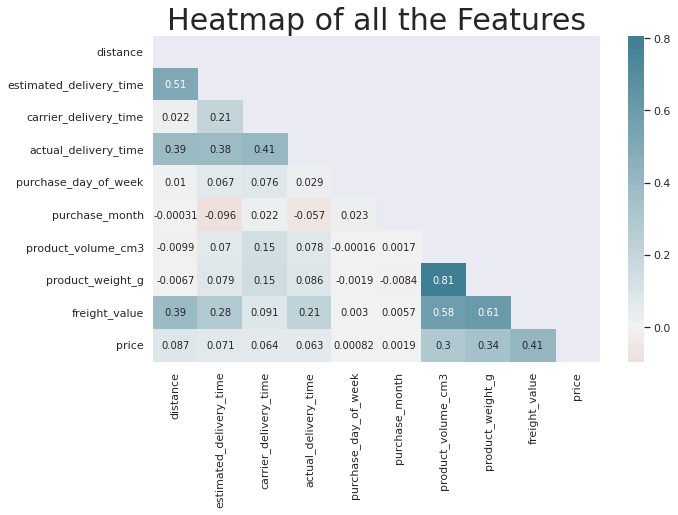

In [21]:
# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(merge_df[merge_df.columns[::-1]].corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10, 6))
sns.heatmap(merge_df[merge_df.columns[::-1]].corr(), cmap=sns.diverging_palette(20, 220, n=200), annot=True, mask=mask, center = 0, )
plt.title("Heatmap of all the Features", fontsize = 30)
#plt.yticks(rotation=0)

Features and target Variable: Try different combinations, choose the most correlated

In [22]:
target = 'estimated_delivery_time'
features = ['freight_value', 
            'product_volume_cm3', 
            'product_weight_g', 
            #'purchase_day_of_week', 
            #'price',
            #'estimated_delivery_time',
            'carrier_delivery_time',
            'distance'
           ]

# Create Models

Create X (features) and Y (target)

In [23]:
X = merge_df[features]
y = merge_df[target]

Scale and Split Dataset : Train and test (80% / 20%): 

X_train, y_train and X_test, y_test

In [24]:
X_data = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_data, y, test_size=0.2, random_state = 14)

Models & Pipeline of models: 

Try different models:  (create array of models: model name and instance)

Regressor:

-Lasso

-Ridge

KNN Regressor

Random Forest Regressor

Extra Tree Regressor

Gradient Boost Regressor

XGBoost

Other tested:

MLP Regressor

In [25]:

#num_pipeline = Pipeline([
#    ('imputer', SimpleImputer(strategy = 'median')),
#    ('std_scaler', StandardScaler())
#])

models = [
           ['Lasso: ', Lasso()],
           ['Ridge: ', Ridge()],
           ['KNeighborsRegressor: ',  neighbors.KNeighborsRegressor()],
           ['RandomForest ',RandomForestRegressor()],
           ['ExtraTreeRegressor :',ExtraTreesRegressor()],
           ['GradientBoostingRegressor: ', GradientBoostingRegressor()] ,
           ['XGBoost: ', XGBRegressor()] ,
           #['MLPRegressor: ', MLPRegressor(  activation='relu', solver='adam',learning_rate='adaptive',max_iter=10000,learning_rate_init=0.01,alpha=0.01)]
         ]



Cycle for each model:

Save information for each model on the dataframe: curr_model_data 

Start Model: Random State =100 

Fit Model: X_train, y_train

Calculate Time : start - end

Metrics:
R squared : X_train, X_test

RMSE: y_test, X_test


In [28]:
model_data = []
for name,curr_model in models :
    curr_model_data = {}
    curr_model.random_state = 100
    curr_model_data["Name"] = name
    start = time.time()
    curr_model.fit(X_train,y_train)
    end = time.time()
    curr_model_data["Train_Time"] = end - start
    curr_model_data["Train_R2_Score"] = metrics.r2_score(y_train,curr_model.predict(X_train))
    curr_model_data["Test_R2_Score"] = metrics.r2_score(y_test,curr_model.predict(X_test))
    curr_model_data["Test_RMSE"] = sqrt(mean_squared_error(y_test,curr_model.predict(X_test)))/100
    model_data.append(curr_model_data)

[20:29:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


# Models Comparison and Scores

Model Scores: Show Model Data

In [29]:
model_scores = pd.DataFrame(model_data)
model_scores

Name  Train_Time  ...  Test_R2_Score  Test_RMSE
0                      Lasso:     0.045423  ...       0.272604   0.075790
1                      Ridge:     0.078864  ...       0.300734   0.074310
2        KNeighborsRegressor:     0.341887  ...       0.376931   0.070145
3                RandomForest    48.754090  ...       0.518952   0.061634
4         ExtraTreeRegressor :   17.453505  ...       0.506117   0.062451
5  GradientBoostingRegressor:    12.811162  ...       0.424435   0.067418
6                    XGBoost:     4.918286  ...       0.422809   0.067513

[7 rows x 5 columns]

Model Scores

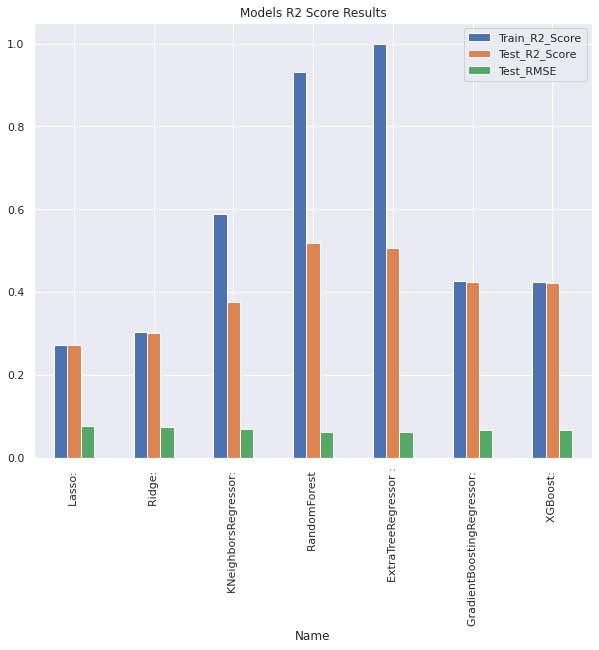

In [30]:
model_scores.plot(x="Name", y=['Train_R2_Score', 'Test_R2_Score', 'Test_RMSE'], kind="bar" , title = 'Models R2 Score Results' , figsize= (10,8)) ;

After the graphic we see the Random Forest Regressor Model have the best R square. 

Extra Tree is overfitting and other models are undefitting.

Instance of the model, fit the model and
create the predictions: y_pred

In [31]:
regressor = RandomForestRegressor(n_estimators=200, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

Check MAE for Random Forest Regressor: (lowest MAE)

In [50]:
print("Random Forest Regressor's Mean Absolute Error: " + str(mean_absolute_error(y_pred, y_test)))
y.describe()

Random Forest Regressor's Mean Absolute Error: 4.212753302539734


count    109641.000000
mean         23.437364
std           8.832407
min           2.000000
25%          18.000000
50%          23.000000
75%          28.000000
max         155.000000
Name: estimated_delivery_time, dtype: float64

In [57]:
errors = abs((y_pred - y_test)/y_test)
print('Mean Relative Error:', round(np.mean(errors), 2)) 
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
mape = np.mean(np.abs((y_test - y_pred) / np.abs(y_test)))
print('Mean Absolute Percentage Error (MAPE):', round(mape * 100, 2))
print('Model Accuracy:', round(100*(1 - mape), 2))


Mean Relative Error: 0.21
Mean Absolute Error (MAE): 4.212753302539734
Mean Squared Error (MSE): 37.83618545269273
Root Mean Squared Error (RMSE): 6.151112537801006
Mean Absolute Percentage Error (MAPE): 21.3
Model Accuracy: 78.7


Prediction accuracy is 51% with a mean square error of 4 days. The model accuracy is at an acceptable level. There are several point to take note in order to improve the accuracy of the model

1. There are outliers in the data that can be removed (max delivery time is 125 days while the mean is roughly 3)

2. Distance is not a good representation of how hard it may take for an object to go from A to B. Transport infrastructure, availabilty of flights, metro, trains and developments in sellers' location can influence the time taken to deliver. We do not have these information.

3. The records suggest that Olist's delivery system between 2017 and 2018 was inefficient and thus making any hopes to properly predicting the delivery time tedious.

4. Lastly, the fact that our model's MAE was shorter than 5 days means the regressors are within two-thirds of our target data's standard deviation, which in several situations is an acceptable level of accuracy. 

The extreme randomness of the data's distribution makes it difficult to reach very high levels of accuracy

# Cross Validation and Learning Curve

Cross Validation (CV: Shuffle Split, 20% test size, 5 splits) and Learning Curve:


---



In [51]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

In [ ]:
#cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cv = ShuffleSplit(n_splits=2, test_size=0.2, random_state=0) #quick
#cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = RandomForestRegressor()
#cv.get_n_splits(X_train)



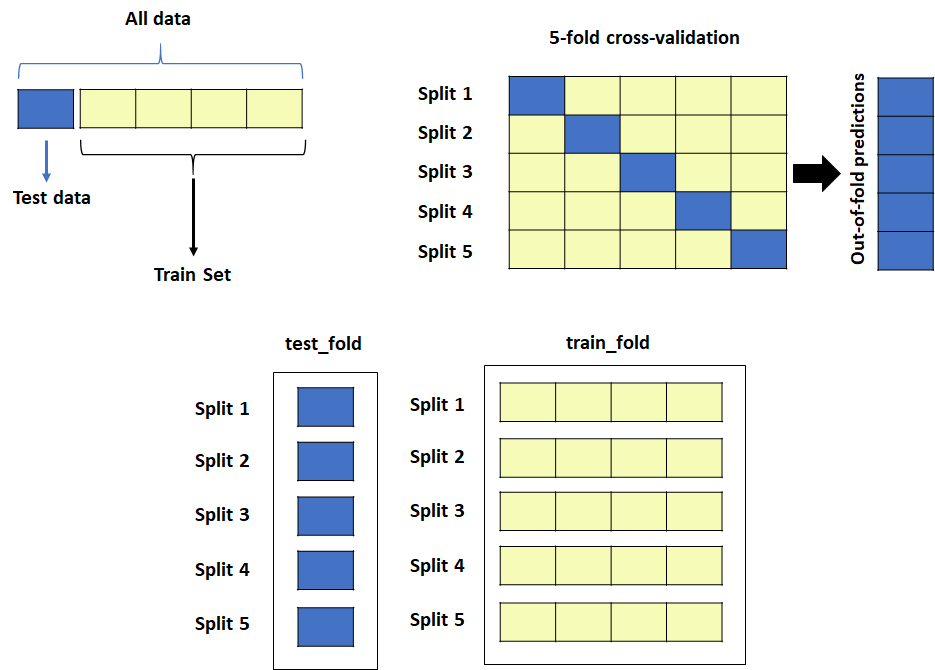


Calculate per set: 

train_sizes, train_scores, test_scores and fit_times

In [ ]:
train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(estimator, X_train,pd.Series.ravel(y_train), cv=cv, n_jobs=4, 
                                                                      train_sizes=np.linspace(.1, 1.0, 5), return_times=True)

*Plot Learning Curve:* Training score vs Cross-validation score

*Scalability of the model:* Plot for n_samples vs fit_times

*Performance of the model:* Plot fit_time vs score

Text(0.5, 1.0, 'Performance of the model')

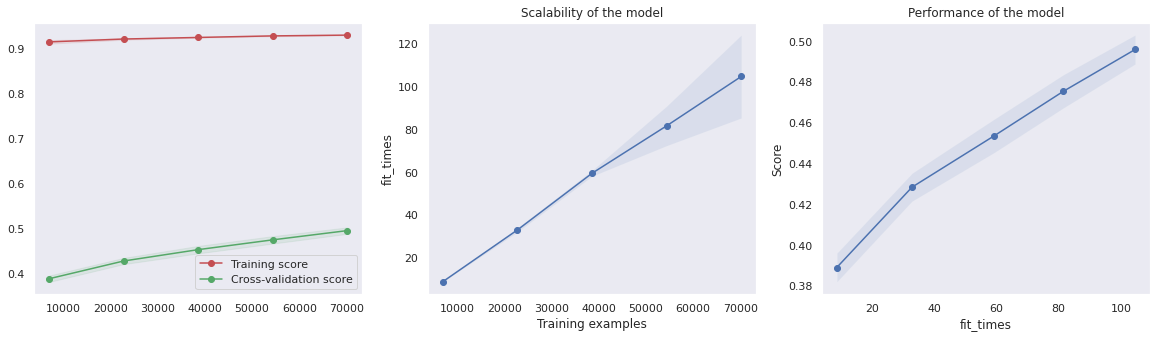

In [ ]:
_, axes = plt.subplots(1, 3, figsize=(20, 5))

#calculate mean and std for train, test scores, fit times
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
fit_times_mean = np.mean(fit_times, axis=1)
fit_times_std = np.std(fit_times, axis=1)

# Plot learning curve: train sizes vs train score vs CV score
axes[0].grid()
axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1,
                     color="g")
axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
axes[0].legend(loc="best")

# Plot n_samples vs fit_times
axes[1].grid()
axes[1].plot(train_sizes, fit_times_mean, 'o-')
axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                     fit_times_mean + fit_times_std, alpha=0.1)
axes[1].set_xlabel("Training examples")
axes[1].set_ylabel("fit_times")
axes[1].set_title("Scalability of the model")
# Plot fit_time vs score
axes[2].grid()
axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1)
axes[2].set_xlabel("fit_times")
axes[2].set_ylabel("Score")
axes[2].set_title("Performance of the model")



---

